<a href="https://colab.research.google.com/github/srushtig172/861_Srushti-Ghadge/blob/main/202201090125_Assignment5_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab Assignment -NLP

**Course Name:** [Deep Learning]

**Lab Title:** NLP Techniques for Text Classification

**Student Name:**[Srushti Ghadge]

**Student ID:**[202210190125]

**Date of Submission:** [22/04/2025]

**Group Members**: [Samruddhi Bhujbal, Snehal Bankar]

# Experiment 5.1:
# To forecast future values of a univariate time series using LSTM-based models.









## Importing libraries

In [ ]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# setting gloabl params for all matplotlib plots
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## Loading dataset

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "samruddhibhujbal123 " # username from the json file
os.environ['KAGGLE_KEY'] = "c12d7125c7a548fa383c040314088309" # key from the json file

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipullrathod/daily-min-temperatures")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/daily-min-temperatures


In [ ]:
#raeding the dataframe
df = pd.read_csv('/content/sample_data/daily-min-temperatures.csv')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [ ]:
# univariate dataframe: Temp vs Time
uni_data_df = df['Temp']# variable
uni_data_df.index = df['Date']#index
uni_data_df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<Axes: xlabel='Date'>

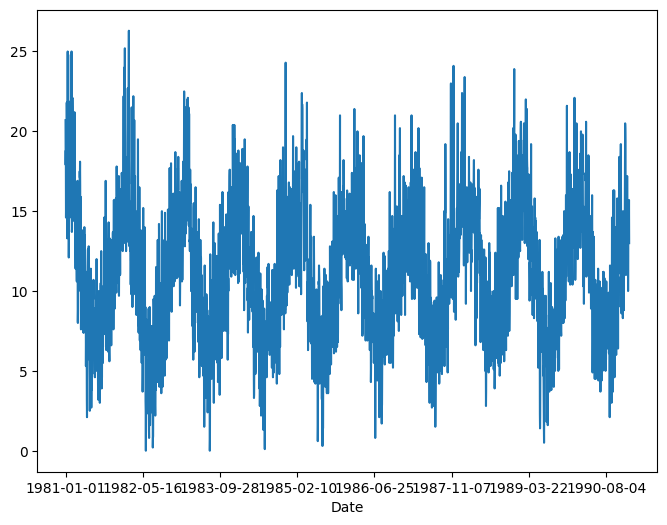

In [ ]:
uni_data_df.plot()

In [ ]:
uni_data = uni_data_df.values # numpy ndarray from pandas

In [ ]:
TRAIN_SPLIT = 3000 # First 3000 obs will be used as train data and rest as test data.
tf.random.set_seed(13) # random seed

# standardization of data: mean centering and variance-scaling.
# NOTE: use only train data to normalize all of the data. otherwise, leakage-issue
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

uni_data = (uni_data-uni_train_mean)/uni_train_std
print(type(uni_data))

<class 'numpy.ndarray'>


In [ ]:
# This function creates the data we need for the above problem
# dataset: numpy ndarray
# start_index:
# end_index:
# history_size: k => take k values at a time
# target_size: 0 => next value in the time-series
# Output: data: (n,k) and labels (n,1)

def univariate_data(dataset, start_index, end_index, history_size, target_size):
    """function to create input and ouput values for univariate time series forecasting"""
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        #print(indices)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))

        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)
# use the above function to create the datasets.
univariate_past_history = 20
univariate_future_target =0
x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                        univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

print(x_train_uni.shape)
print(y_train_uni.shape)
print(x_val_uni.shape)
print(y_val_uni.shape)

(2980, 20, 1)
(2980,)
(630, 20, 1)
(630,)


In [ ]:
#utility function used for ploting
def create_time_steps(length):
  return list(range(-length, 0))
print(create_time_steps(20))

[-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


91/91 - 4s - 47ms/step - loss: 0.0315 - val_loss: 0.0112
Epoch 2/10
91/91 - 2s - 25ms/step - loss: 0.0126 - val_loss: 0.0100
Epoch 3/10
91/91 - 1s - 13ms/step - loss: 0.0119 - val_loss: 0.0096
Epoch 4/10
91/91 - 1s - 14ms/step - loss: 0.0116 - val_loss: 0.0094
Epoch 5/10
91/91 - 1s - 16ms/step - loss: 0.0114 - val_loss: 0.0092
Epoch 6/10
91/91 - 2s - 20ms/step - loss: 0.0112 - val_loss: 0.0090
Epoch 7/10
91/91 - 1s - 14ms/step - loss: 0.0109 - val_loss: 0.0088
Epoch 8/10
91/91 - 1s - 14ms/step - loss: 0.0107 - val_loss: 0.0085
Epoch 9/10
91/91 - 1s - 14ms/step - loss: 0.0105 - val_loss: 0.0083
Epoch 10/10
91/91 - 1s - 14ms/step - loss: 0.0103 - val_loss: 0.0081
✅ RMSE: 2.3668
✅ MAE: 1.8380


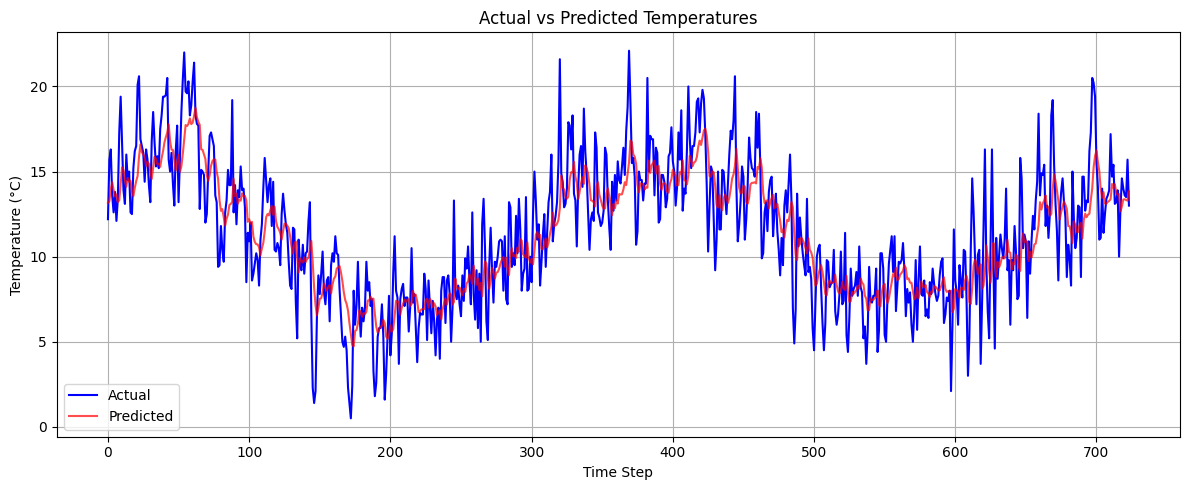

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Load dataset
df = pd.read_csv('/content/sample_data/daily-min-temperatures.csv')  # Update path if needed
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df['Temp'].values

# Step 2: Normalize
min_val = np.min(data)
max_val = np.max(data)
data = (data - min_val) / (max_val - min_val)

# Step 3: Create sequences
def create_dataset(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

WINDOW_SIZE = 30
X, y = create_dataset(data, WINDOW_SIZE)

# Step 4: Split into train/val
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# Step 5: Convert to TensorFlow dataset
BATCH_SIZE = 32
train_univariate = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE)
val_univariate = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)

# Step 6: Build and train simple LSTM model
simple_lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(WINDOW_SIZE, 1)),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mse')
simple_lstm_model.fit(
    train_univariate.map(lambda x, y: (tf.expand_dims(x, axis=-1), y)),
    epochs=10,
    validation_data=val_univariate.map(lambda x, y: (tf.expand_dims(x, axis=-1), y)),
    verbose=2
)

# Step 7: Evaluate on validation
actual, predicted = [], []
for batch in val_univariate:
    x_batch, y_batch = batch
    preds = simple_lstm_model.predict(tf.expand_dims(x_batch, -1), verbose=0)
    predicted.extend(preds.flatten())
    actual.extend(y_batch.numpy().flatten())

# Step 8: Rescale back
actual = np.array(actual) * (max_val - min_val) + min_val
predicted = np.array(predicted) * (max_val - min_val) + min_val

# Step 9: Metrics
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f" RMSE: {rmse:.4f}")
print(f" MAE: {mae:.4f}")

# Step 10: Plot
plt.figure(figsize=(12, 5))
plt.plot(actual, label='Actual', color='blue')
plt.plot(predicted, label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted Temperatures')
plt.xlabel('Time Step')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[array([[2.30078829],
       [1.61969548],
       [1.83861817],
       [0.81697894],
       [1.10887586],
       [1.10887586],
       [1.10887586],
       [1.49807176],
       [2.56836047],
       [2.13051509],
       [1.20617484],
       [0.50075728],
       [1.32779855],
       [2.49538624],
       [3.34675226],
       [2.30078829],
       [2.27646355],
       [3.29810277],
       [1.57104599],
       [1.03590163]]), np.float64(1.6926697064490892)]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

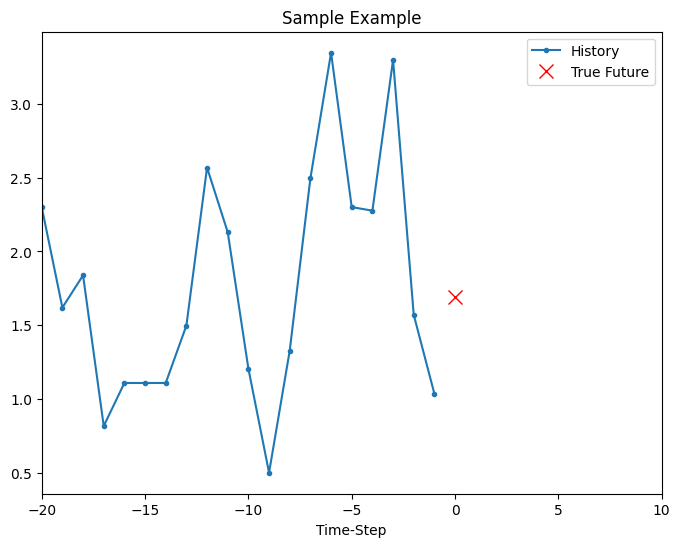

In [ ]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go'] # dot-line, red-x, green-o  refer: https://matplotlib.org/3.1.1/api/markers_api.html
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0
    print(plot_data)
    plt.title(title)
    # Removed extra space before the loop
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
                    label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')
#show_plot([x_train_uni[1], y_train_uni[1]], 1, 'Sample Example')

In [ ]:
# TF Dataset preperation
BATCH_SIZE = 256 # bacth size in batch-SGD/variants
BUFFER_SIZE = 10000 # for shuffling the dataset

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
#https://www.tensorflow.org/api_docs/python/tf/data/Dataset#repeat

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

print(train_univariate)
print(val_univariate)

<_RepeatDataset element_spec=(TensorSpec(shape=(None, 20, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<_RepeatDataset element_spec=(TensorSpec(shape=(None, 20, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [ ]:
print(x_train_uni.shape)
print(x_train_uni.shape[-2:])


(2980, 20, 1)
(20, 1)


In [ ]:
# MODEL:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train and evaluate
STEPS_PER_EPOCH = 200
EPOCHS = 10

simple_lstm_model.fit(
    train_univariate,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=val_univariate,
    validation_steps=50,
    verbose=2
)


Epoch 1/10
200/200 - 5s - 26ms/step - loss: 0.6223 - val_loss: 0.4622
Epoch 2/10
200/200 - 2s - 10ms/step - loss: 0.4988 - val_loss: 0.4383
Epoch 3/10
200/200 - 2s - 10ms/step - loss: 0.4756 - val_loss: 0.4286
Epoch 4/10
200/200 - 2s - 11ms/step - loss: 0.4684 - val_loss: 0.4288
Epoch 5/10
200/200 - 2s - 10ms/step - loss: 0.4657 - val_loss: 0.4259
Epoch 6/10
200/200 - 3s - 13ms/step - loss: 0.4637 - val_loss: 0.4254
Epoch 7/10
200/200 - 2s - 12ms/step - loss: 0.4622 - val_loss: 0.4253
Epoch 8/10
200/200 - 2s - 11ms/step - loss: 0.4613 - val_loss: 0.4259
Epoch 9/10
200/200 - 2s - 11ms/step - loss: 0.4595 - val_loss: 0.4252
Epoch 10/10
200/200 - 3s - 13ms/step - loss: 0.4589 - val_loss: 0.4267


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
[array([[ 1.37644804],
       [ 1.27914907],
       [ 0.57373151],
       [ 0.47643253],
       [-0.44790772],
       [-0.42358297],
       [ 0.13588613],
       [-0.20466028],
       [-0.37493349],
       [ 0.33048407],
       [ 0.50075728],
       [ 0.93860266],
       [ 0.71967997],
       [ 0.71967997],
       [ 1.93591714],
       [ 0.33048407],
       [ 0.71967997],
       [ 0.16021087],
       [ 0.64670574],
       [ 0.54940676]]), np.float64(0.9872521461950612), array([0.59788287], dtype=float32)]


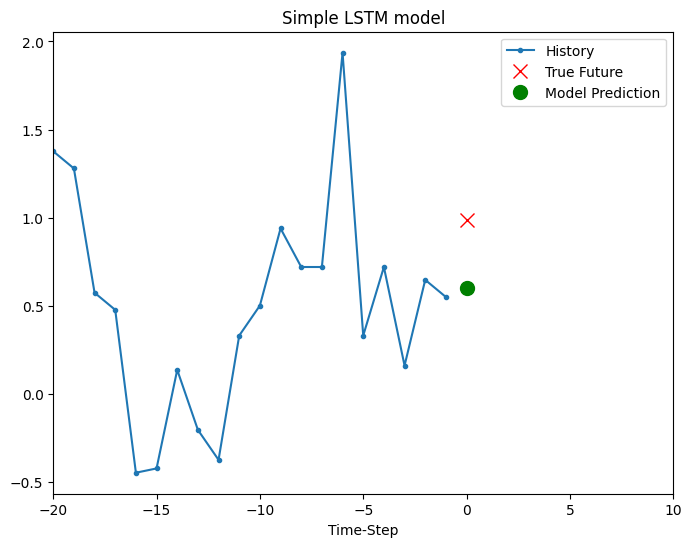

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[array([[ 0.59805625],
       [ 0.50075728],
       [-0.1560108 ],
       [ 0.69535522],
       [ 1.15752535],
       [ 1.27914907],
       [ 0.69535522],
       [ 1.81429342],
       [ 1.20617484],
       [ 0.86562843],
       [ 0.33048407],
       [-0.20466028],
       [ 0.2331851 ],
       [ 0.33048407],
       [ 0.20886036],
       [ 1.47374702],
       [ 1.25482432],
       [ 0.33048407],
       [ 0.25750984],
       [ 0.13588613]]), np.float64(0.18453561211289063), array([0.46775055], dtype=float32)]


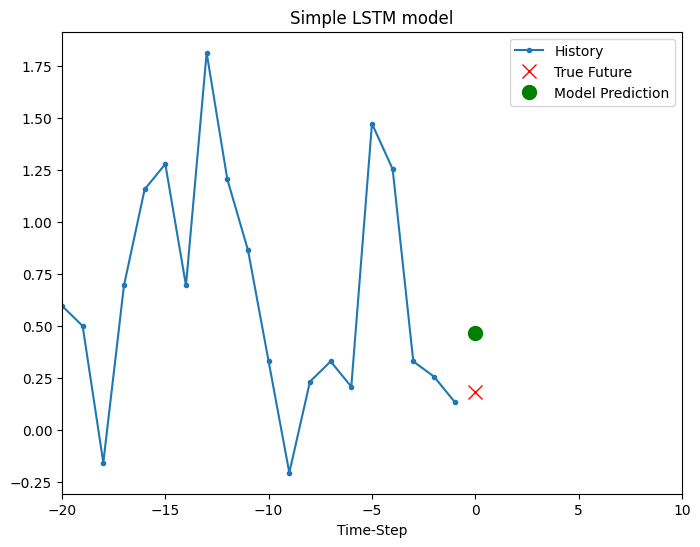

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[array([[-0.83710361],
       [-0.93440259],
       [-0.86142836],
       [-0.56953144],
       [-0.37493349],
       [-0.326284  ],
       [-1.25062425],
       [-1.12900053],
       [-0.8857531 ],
       [-0.93440259],
       [-0.78845413],
       [-2.22361399],
       [-1.29927374],
       [ 0.08723664],
       [-0.64250567],
       [-0.81277887],
       [-1.274949  ],
       [-0.42358297],
       [-0.64250567],
       [-0.8857531 ]]), np.float64(-0.20466028319967672), array([-0.7417619], dtype=float32)]


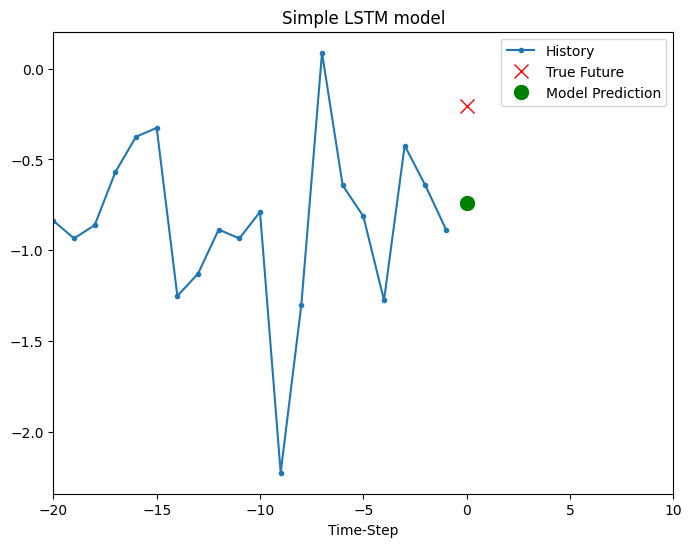

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[array([[ 1.37644804],
       [ 1.27914907],
       [ 0.57373151],
       [ 0.47643253],
       [-0.44790772],
       [-0.42358297],
       [ 0.13588613],
       [-0.20466028],
       [-0.37493349],
       [ 0.33048407],
       [ 0.50075728],
       [ 0.93860266],
       [ 0.71967997],
       [ 0.71967997],
       [ 1.93591714],
       [ 0.33048407],
       [ 0.71967997],
       [ 0.16021087],
       [ 0.64670574],
       [ 0.54940676]]), np.float64(0.9872521461950612), array([0.59788287], dtype=float32)]


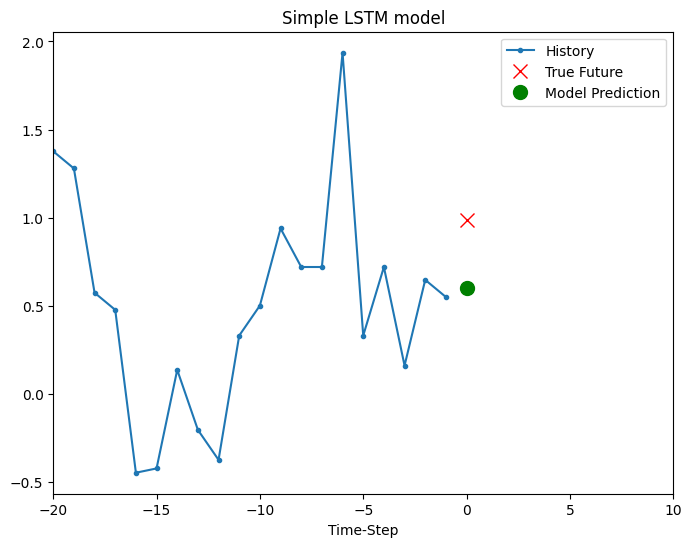

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[array([[ 0.59805625],
       [ 0.50075728],
       [-0.1560108 ],
       [ 0.69535522],
       [ 1.15752535],
       [ 1.27914907],
       [ 0.69535522],
       [ 1.81429342],
       [ 1.20617484],
       [ 0.86562843],
       [ 0.33048407],
       [-0.20466028],
       [ 0.2331851 ],
       [ 0.33048407],
       [ 0.20886036],
       [ 1.47374702],
       [ 1.25482432],
       [ 0.33048407],
       [ 0.25750984],
       [ 0.13588613]]), np.float64(0.18453561211289063), array([0.46775055], dtype=float32)]


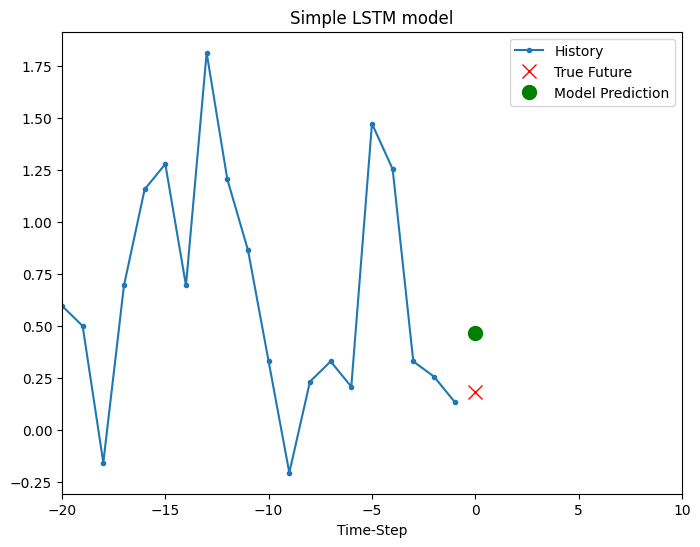

In [ ]:

for x, y in val_univariate.take(5): # take 5 random inputs from validation data
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

# Experiment 5.2: Sequence Text Prediction using LSTM:

### Importing The Required Libraries:

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
try:
    with open("/content/dynamite.txt", "r", encoding="utf8") as file:
        lines = file.readlines()
except UnicodeDecodeError:
    with open("/content/dynamite.txt", "r", encoding="ISO-8859-1") as file:
        lines = file.readlines()

print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])


The First Line:  'Cause I-I-I'm in the stars tonight

The Last Line:  So I'ma light it up like dynamite, whoa oh oh


### Cleaning the data:

In [ ]:
data = ""

for i in lines:
    data = ' '. join(lines)

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

"'Cause I-I-I'm in the stars tonight So watch me bring the fire and set the night alight Shoes on, get up in the morn' Cup of milk, let's rock and roll King Kong, kick the drum, rolling on like a Rolling Stone Sing song when I'm walking home Jump up to the top, LeBron Ding dong, call me on my phone Ice tea and a game of ping pong, huh This is getting heavy Ca"

In [ ]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

' Cause I I I m in the stars tonight So watch me bring the fire and set the night alight Shoes on  get up in the morn  Cup of milk  let s rock and roll King Kong  kick the drum  rolling on like a Rolling Stone Sing song when I m walking home Jump up to the top  LeBron Ding dong  call me on my phone Ice tea and a game of ping pong  huh This is getting heavy Can you hear the bass boom  I m ready  woo hoo  Life is sweet as honey Yeah  this beat cha ching like money  huh Disco overload  I m into that'

In [ ]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)

data = ' '.join(z)
data[:500]

"'Cause I-I-I'm in the stars tonight So watch me bring fire and set night alight Shoes on, get up morn' Cup of milk, let's rock roll King Kong, kick drum, rolling on like a Rolling Stone Sing song when I'm walking home Jump to top, LeBron Ding dong, call my phone Ice tea game ping pong, huh This is getting heavy Can you hear bass boom? ready (woo hoo) Life sweet as honey Yeah, this beat cha-ching money, Disco overload, into that, good go diamond, know I glow Hey, so (hey) Shining through city wit"

### Tokenization:

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[19, 2, 2, 6, 20, 21, 22, 23, 7, 24]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

133


In [ ]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  159


array([[19,  2],
       [ 2,  2],
       [ 2,  6],
       [ 6, 20],
       [20, 21],
       [21, 22],
       [22, 23],
       [23,  7],
       [ 7, 24],
       [24, 25]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])

X = np.array(X)
y = np.array(y)

In [ ]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [19  2  2  6 20]
The responses are:  [ 2  2  6 20 21]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.,

### Creating the Model:

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))






/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Plot The Model:

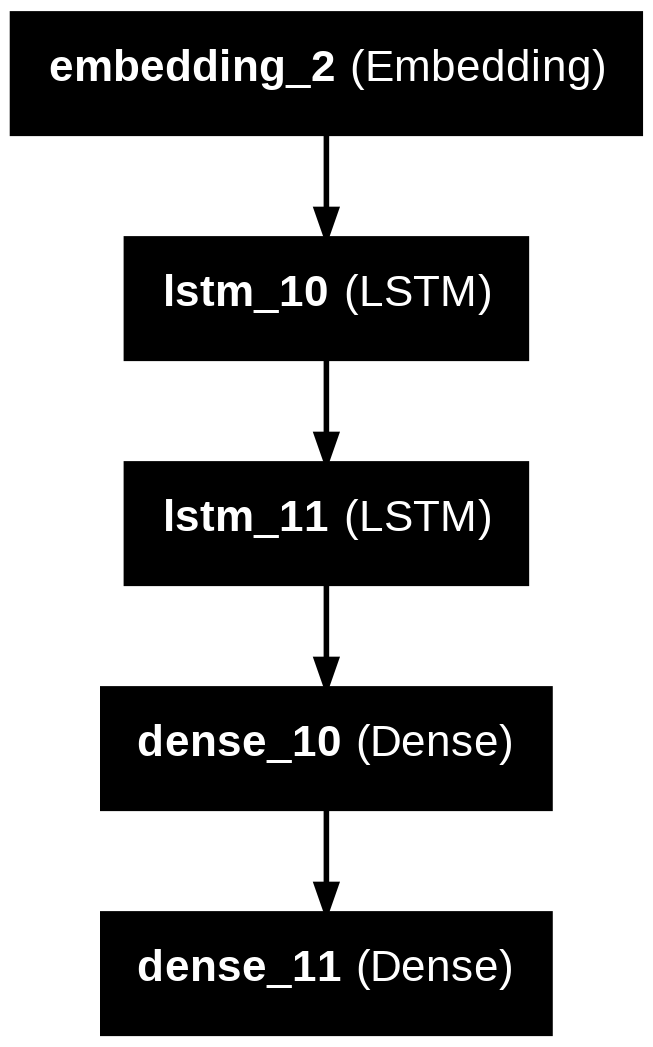

In [ ]:
# ... (your existing code) ...

# Before plotting the model, build it using an input shape
model.build(input_shape=(None, 1))  # Assuming input shape (None, 1) based on your Embedding layer

# Now plot the model
from tensorflow import keras
from keras.utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

### Callbacks:

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

### Compile The Model:

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))

### Fit The Model:

In [ ]:
model.fit(X, y, epochs=5, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - loss: 4.8908
Epoch 1: loss improved from inf to 4.89130, saving model to nextword1.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 518ms/step - loss: 4.8910 - learning_rate: 0.0010
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 4.8876
Epoch 2: loss improved from 4.89130 to 4.88759, saving model to nextword1.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step - loss: 4.8876 - learning_rate: 0.0010
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 4.8851
Epoch 3: loss improved from 4.88759 to 4.88423, saving model to nextword1.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step - loss: 4.8849 - learning_rate: 0.0010
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 4.8809
Epoch 4: loss improved from 4.88423 to 4.87854, saving model to nextword1.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 4.8803 - learning_rate: 0.0010
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 4.8729
Epoch 5: loss improved from 4.87854 to 4.86736, saving model to nextword1.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 465ms/step - loss: 4.8715 - learning_rate: 0.0010


### Graph:

In [ ]:
# Importing the Libraries

from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer

model = load_model('/content/nextword1.h5')
tokenizer = pickle.load(open('/content/tokenizer1.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):
    """
        In this function we are using the tokenizer and models trained
        and we are creating the sequence of the text entered and then
        using our model to predict and return the the predicted word.

    """
    for i in range(3):
        sequence = tokenizer.texts_to_sequences([text])[0]
        sequence = np.array(sequence)

        preds = model.predict_classes(sequence)
#         print(preds)
        predicted_word = ""

        for key, value in tokenizer.word_index.items():
            if value == preds:
                predicted_word = key
                break

        print(predicted_word)
        return predicted_word

In [ ]:
def Predict_Next_Words(model, tokenizer, text):
    for i in range(3):
        sequence = tokenizer.texts_to_sequences([text])[0]
        sequence = np.array(sequence)
        preds = model.predict_classes(sequence)
        ...


In [ ]:

"""
    We are testing our model and we will run the model
    until the user decides to stop the script.
    While the script is running we try and check if
    the prediction can be made on the text. If no
    prediction can be made we just continue.

"""

while(True):

    text = input("Enter your line: ")

    if text == "stop the script":
        print("Ending The Program.....")
        break

    else:
        try:
            text = text.split(" ")
            text = text[-1]

            text = ''.join(text)
            Predict_Next_Words(model, tokenizer, text)

        except:
            continue

Enter your line: This is getting heavy
Enter your line: Can you hear the bass 
Enter your line: Life is sweet as honey
Enter your line: top the script
Enter your line: stop the script
Ending The Program.....


Epoch 1/10
200/200 - 2s - 10ms/step - loss: 0.4582 - val_loss: 0.4248
Epoch 2/10
200/200 - 2s - 12ms/step - loss: 0.4578 - val_loss: 0.4246
Epoch 3/10
200/200 - 3s - 13ms/step - loss: 0.4574 - val_loss: 0.4242
Epoch 4/10
200/200 - 2s - 10ms/step - loss: 0.4566 - val_loss: 0.4248
Epoch 5/10
200/200 - 2s - 10ms/step - loss: 0.4562 - val_loss: 0.4242
Epoch 6/10
200/200 - 2s - 10ms/step - loss: 0.4563 - val_loss: 0.4248
Epoch 7/10
200/200 - 2s - 10ms/step - loss: 0.4555 - val_loss: 0.4252
Epoch 8/10
200/200 - 3s - 14ms/step - loss: 0.4555 - val_loss: 0.4245
Epoch 9/10
200/200 - 2s - 12ms/step - loss: 0.4550 - val_loss: 0.4247
Epoch 10/10
200/200 - 2s - 11ms/step - loss: 0.4546 - val_loss: 0.4245


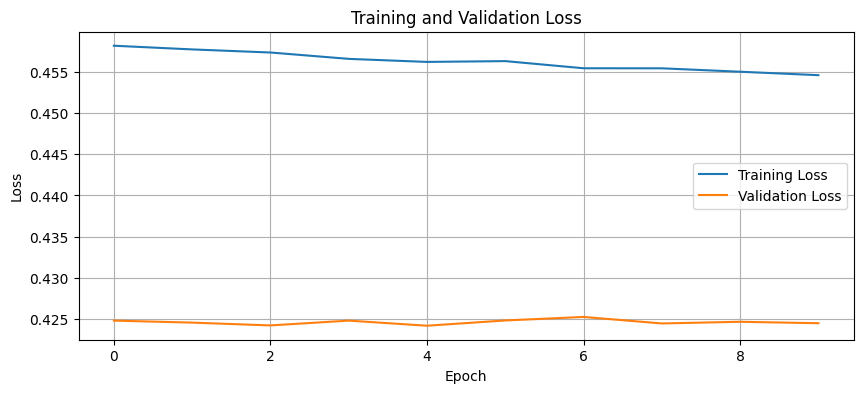

In [ ]:
import matplotlib.pyplot as plt

#  1. Train the model and store history
history = simple_lstm_model.fit(train_univariate,
                                epochs=EPOCHS,
                                steps_per_epoch=STEPS_PER_EPOCH,
                                validation_data=val_univariate,
                                validation_steps=50,
                                verbose=2)

#  2. Plot Training and Validation Loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 3. Plot Accuracy (if available)
if 'accuracy' in history.history:
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Use only the first book
with open(os.path.join(path, "/content/dynamite.txt"), "r", encoding="utf-8") as f:
    all_text = f.read()

print(f"Using {len(all_text)} characters from Book 1")


Using 2507 characters from Book 1


In [ ]:
import numpy as np
import tensorflow as tf

# Create mapping from characters to integers
vocab = sorted(set(all_text))
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

# Encode entire text
text_as_int = np.array([char2idx[c] for c in all_text])

In [ ]:
def generate_text(model, start_string, gen_length=500, temperature=1.0):
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    text_generated = []

    if hasattr(model, 'reset_states'):
        try:
            model.reset_states()
        except Exception as e:
            print("Warning: Could not reset states:", e)

    for _ in range(gen_length):
        predictions = model(input_eval)
        if predictions.shape[1] == 0:
            print("Error: Model returned empty time steps.")
            break

        predictions = predictions[:, -1, :] / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)


# Experiment 5.3: Sequence Text Classification using LSTM

### Objective:To classify text sequences using LSTM-based models (e.g., sentiment or spam detection).



In [ ]:
# Core Libraries
import numpy as np
import pandas as pd
import math
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# TensorFlow/Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

# Scikit-learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Twitter_Data.csv')

# Rename and simplify columns
df = df[['clean_text', 'category']]  # assuming 'clean_text' is the tweet and 'category' is the label
df.rename(columns={'clean_text': 'review', 'category': 'label'}, inplace=True)

# If label 3 is meant to be 'neutral', drop it
df = df[df['label'] != 3]

# Mark sentiment: 0 for negative (<3), 1 for positive (>3)
def mark_sentiment(rating):
    return 0 if rating < 3 else 1

df['label'] = df['label'].apply(mark_sentiment)

# Check and drop missing values
print("Missing labels:", df['label'].isnull().sum())
print("Missing reviews:", df['review'].isnull().sum())
df.dropna(subset=['review'], inplace=True)

# Drop duplicate rows based on label and review
df.drop_duplicates(subset=['label', 'review'], keep='first', inplace=True)

# Preview
df.head()


Missing labels: 0
Missing reviews: 4


,review,label
0,when modi promised “minimum government maximum...,0
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,0
3,asking his supporters prefix chowkidar their n...,0
4,answer who among these the most powerful world...,0


In [ ]:
pos_df=df.loc[df.label==1,:][:10000]
neg_df=df.loc[df.label==0,:][:10000]
df=pd.concat([pos_df,neg_df],ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True) #perform a random shuffle. It's a good practice to shuffle the data before splitting between a train and test set. That way the sentiment classes are equally distributed over the train and test sets. df = df.reindex(np.random.permutation(df.index))
df.head()

,review,label
0,massive crowd the rally bjpshiv sena kolhapur ...,0
1,will anything everything for power ’ now modi ...,0
2,few days before the fake news being give land ...,0
3,little fairy expecting people from today for t...,0
4,new post added mumbai press official site prod...,0


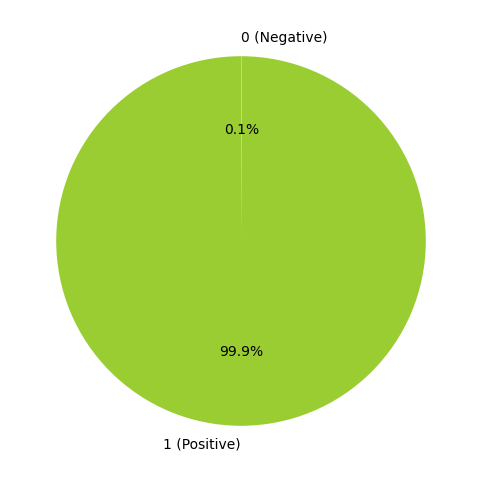

In [ ]:
pie_label = ["1 (Positive)","0 (Negative)"]
pie_colors = ["yellowgreen", "lightskyblue"]
plt.pie(df.label.value_counts(), labels=pie_label, colors=pie_colors, startangle=90, autopct='%.1f%%')
plt.show()

In [ ]:
df['review'] = df.review.apply(lambda x : x.lower())  # all reviews characters converts to lowercase
df['review'] = df.review.apply(lambda x: re.sub(r'\d+','', x))  # remove the numbers in reviews
df['review'] = df.review.apply(lambda x: re.sub(r'[^\w\s]', ' ',x)) # remove the punctuations in reviews
df['review'] = df.review.apply(lambda x: x.strip()) # remove whitespaces

In [ ]:
x = df['review']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

tokenizer = Tokenizer(num_words=5000)  # Initialize the tokenizer with a 5000 word limit. This is the number of words we would like to encode.
tokenizer.fit_on_texts(x_train) # we call fit_on_texts to create associations of words and numbers

# After having created the dictionary we can convert the text to a list of integer indexes.
# This is done with the text_to_sequences method of the Tokenizer.
# calling text_to_sequence replaces the words in a sentence with their respective associated numbers.
# This transforms each sentence into sequences of numbers.
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
from os import nice
# The reviews have different number of words, therefore, the length of the sequence of numbers will be different.
# Our model requires inputs to have equal lengths, so we will have to pad the sequence to have the chosen length of inputs.
# This is done by calling the pad_sequence method with a length of 200.
vocab_size = len(tokenizer.word_index) + 1
max_review_length = 200

x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)
print(x_train.shape)






(8005, 200)


# Model 1
**Embedding -> LSTM -> Dense(Output(Sigmoid))**

In [ ]:
# Build Model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length =max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=5)
result = model.evaluate(x_test, y_test, verbose=0)
#Results
print("Test Score:", result[0])
print("Test Accuracy:", result[1])
print("Accuracy: %.2f%%" % (result[1]*100))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 468ms/step - accuracy: 0.9639 - loss: 0.2602 - val_accuracy: 1.0000 - val_loss: 6.5466e-04
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 505ms/step - accuracy: 0.9992 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 8.9250e-04
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 473ms/step - accuracy: 0.9992 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 9.3311e-04
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 465ms/step - accuracy: 0.9992 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 9.3997e-04
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 462ms/step - accuracy: 0.9992 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 9.4619e-04
Test Score: 0.0009461853769607842
Test Accuracy: 1.0
Accuracy: 100.00%


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


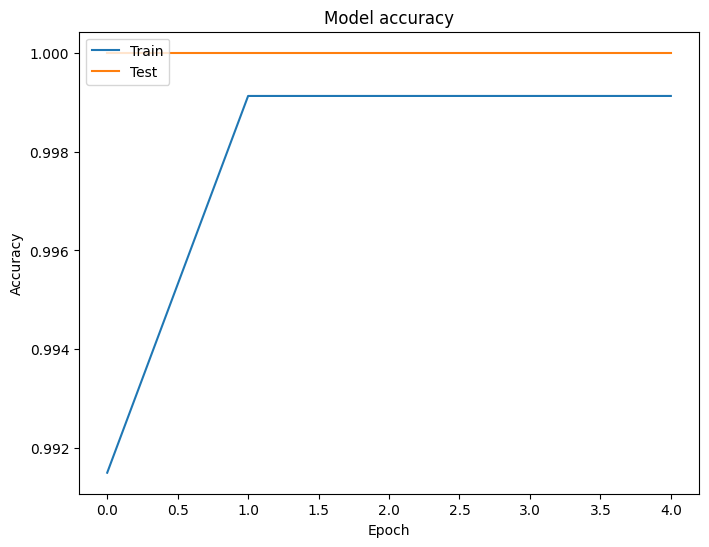

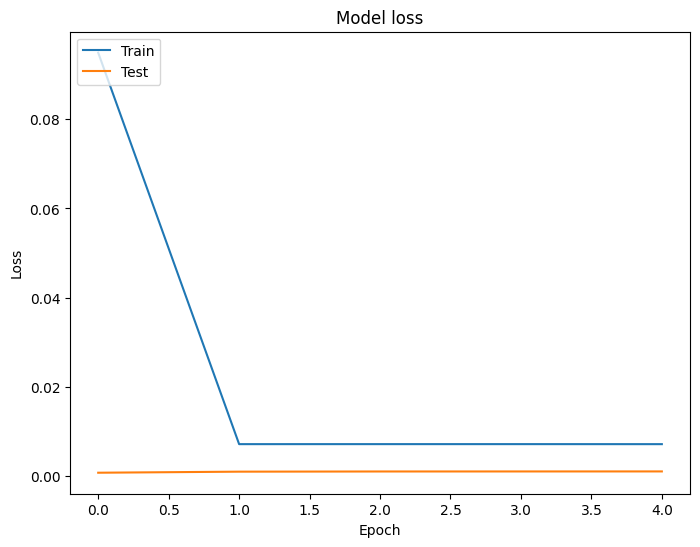

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Model 2
**Embedding -> LSTM -> Dense(Output(Sigmoid))**                                                        
**Same with Model 1 except optimization algorithm. In this study used Adadelta optimizer. With this model, the effect of optimization algorithm is observed.**

In [ ]:
# Build Model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length =max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=5)
result = model.evaluate(x_test, y_test, verbose=0)
#Results
print("Test Score:", result[0])
print("Test Accuracy:", result[1])
print("Accuracy: %.2f%%" % (result[1]*100))

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 471ms/step - accuracy: 0.4142 - loss: 0.6940 - val_accuracy: 0.4885 - val_loss: 0.6934
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 469ms/step - accuracy: 0.5180 - loss: 0.6932 - val_accuracy: 0.5859 - val_loss: 0.6926
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 462ms/step - accuracy: 0.6262 - loss: 0.6923 - val_accuracy: 0.6963 - val_loss: 0.6916
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 471ms/step - accuracy: 0.7188 - loss: 0.6913 - val_accuracy: 0.7917 - val_loss: 0.6907
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 527ms/step - accuracy: 0.8111 - loss: 0.6904 - val_accuracy: 0.8701 - val_loss: 0.6897
Test Score: 0.6896781921386719
Test Accuracy: 0.8701298832893372
Accuracy: 87.01%


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


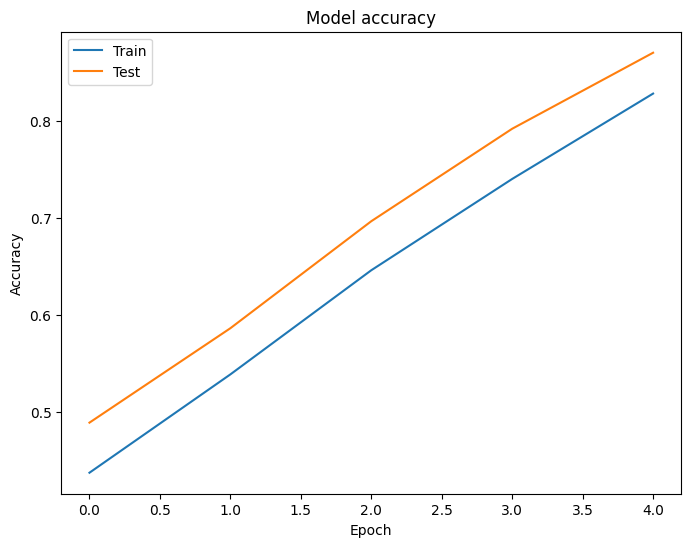

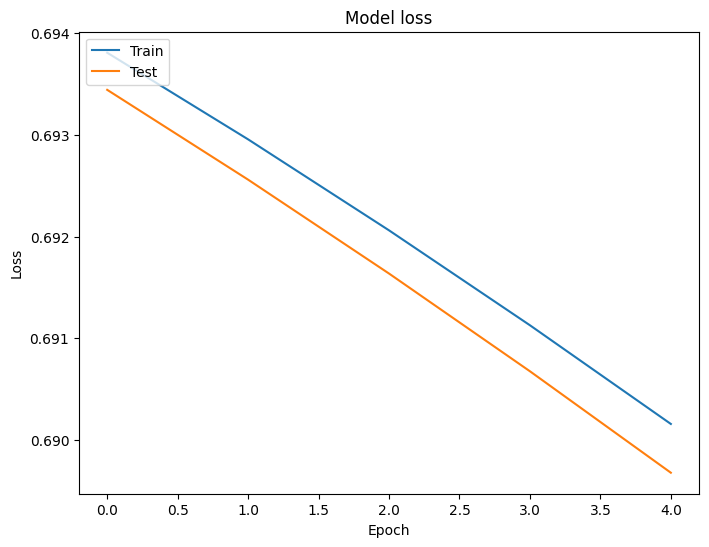

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Model 3
**Embedding -> LSTM -> Dense(Output(Sigmoid))**                                                          
**Same as Model 1, only batch_size different. With this model, the effect of batch size is observed.**

In [ ]:
# Build Model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length =max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=256, epochs=5)
result = model.evaluate(x_test, y_test, verbose=0)
#Results
print("Test Score:", result[0])
print("Test Accuracy:", result[1])
print("Accuracy: %.2f%%" % (result[1]*100))

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 789ms/step - accuracy: 0.9340 - loss: 0.3727 - val_accuracy: 1.0000 - val_loss: 9.0013e-04
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 793ms/step - accuracy: 0.9992 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 5.9110e-04
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 777ms/step - accuracy: 0.9992 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 7.9525e-04
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 837ms/step - accuracy: 0.9992 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 8.8201e-04
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 756ms/step - accuracy: 0.9992 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 8.8988e-04
Test Score: 0.0008898784290067852
Test Accuracy: 1.0
Accuracy: 100.00%


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


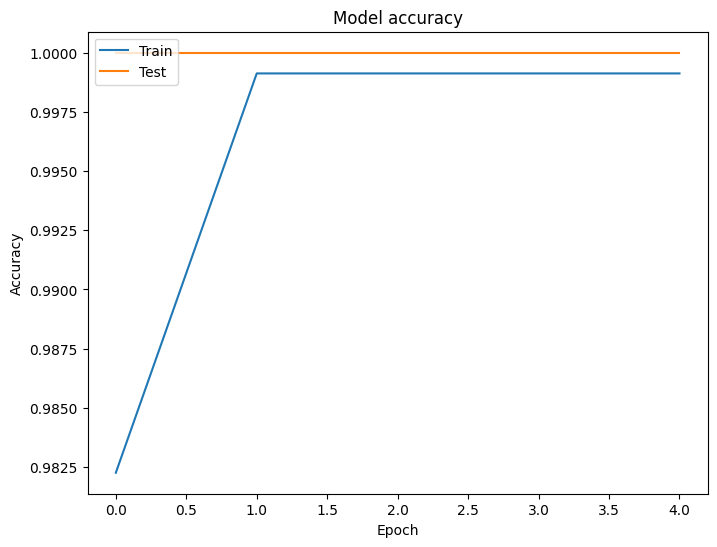

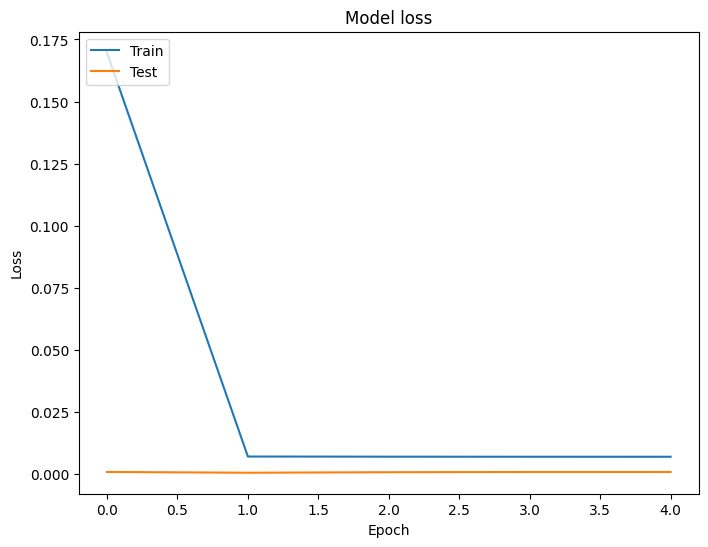

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Model 4
**Embedding -> LSTM -> LSTM -> Dense(Output(Sigmoid))**

In [ ]:
# Build Model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length =max_review_length))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=5)
result = model.evaluate(x_test, y_test, verbose=0)
# Results
print("Test Score:", result[0])
print("Test Accuracy:", result[1])
print("Accuracy: %.2f%%" % (result[1]*100))

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9848 - loss: 0.1922 - val_accuracy: 1.0000 - val_loss: 5.6586e-04
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.9992 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 9.4632e-04
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 992ms/step - accuracy: 0.9992 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 9.6204e-04
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9992 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 9.6434e-04
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 985ms/step - accuracy: 0.9992 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 9.6576e-04
Test Score: 0.0009657593909651041
Test Accuracy: 1.0
Accuracy: 100.00%


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


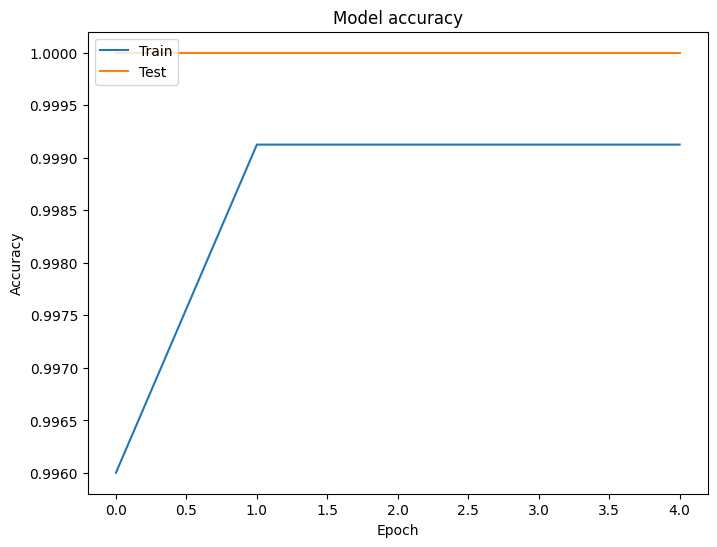

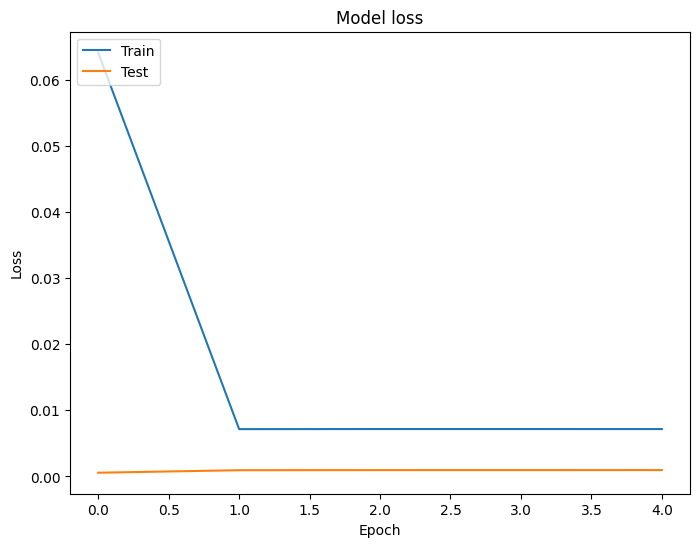

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Model 5
**Embedding -> LSTM -> Dropout -> LSTM -> Dropout -> Dense(Output(Sigmoid))**

In [ ]:
from keras.layers import Dropout
# Build Model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length =max_review_length))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=5)
result = model.evaluate(x_test, y_test, verbose=0)
# Results
print("Test Score:", result[0])
print("Test Accuracy:", result[1])
print("Accuracy: %.2f%%" % (result[1]*100))

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9674 - loss: 0.2057 - val_accuracy: 1.0000 - val_loss: 2.4797e-04
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9992 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 6.0173e-04
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9992 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 5.7430e-04
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9992 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 6.4459e-04
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9992 - loss: 0.0068 - val_accuracy: 1.0000 - val_loss: 5.1159e-04
Test Score: 0.0005115896346978843
Test Accuracy: 1.0
Accuracy: 100.00%


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


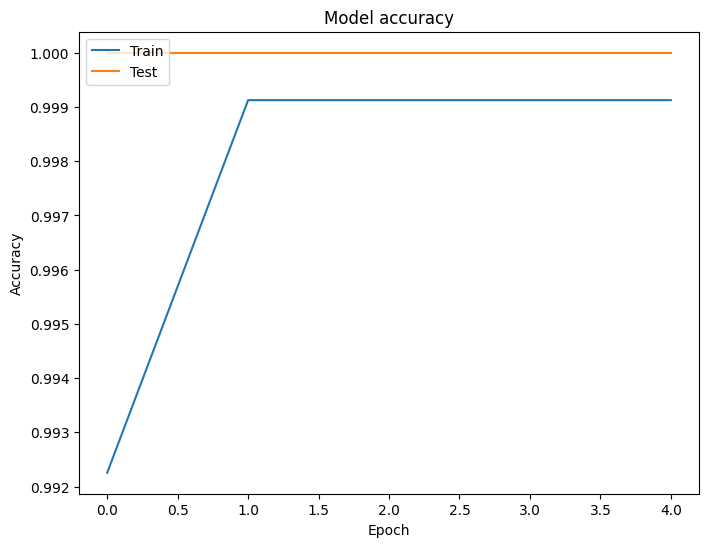

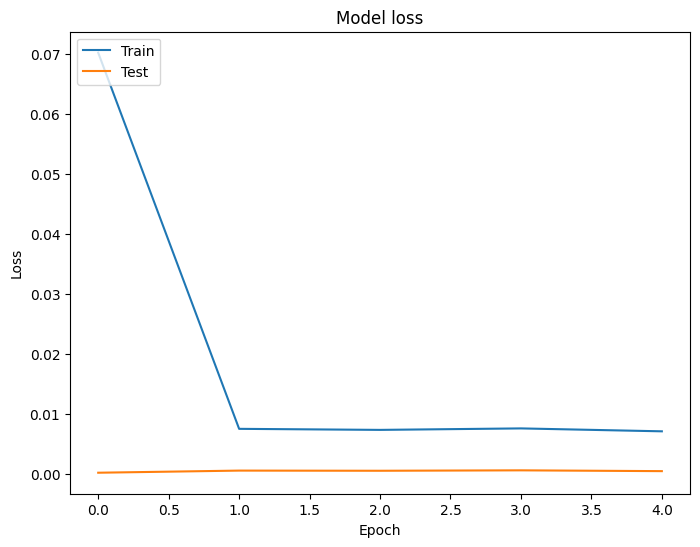

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Model 6
**Embedding -> LSTM -> Dense(activation:Relu) -> Dense(Output(Sigmoid))**                             
**With this model, the effect of activation function is observed.**

In [ ]:
# Build Model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length =max_review_length))
model.add(LSTM(100))
model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=5)
result = model.evaluate(x_test, y_test, verbose=0)
# Results
print("Test Score:", result[0])
print("Test Accuracy:", result[1])
print("Accuracy: %.2f%%" % (result[1]*100))

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 472ms/step - accuracy: 0.9628 - loss: 0.2946 - val_accuracy: 1.0000 - val_loss: 1.4269e-04
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 476ms/step - accuracy: 0.9992 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 8.2722e-04
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 478ms/step - accuracy: 0.9992 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 9.8567e-04
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 475ms/step - accuracy: 0.9992 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 9.9092e-04
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 479ms/step - accuracy: 0.9992 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 9.9593e-04
Test Score: 0.0009959331946447492
Test Accuracy: 1.0
Accuracy: 100.00%


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


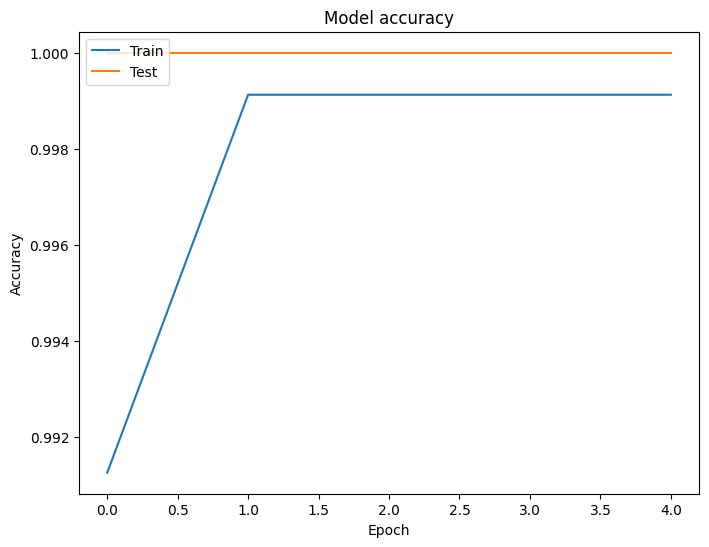

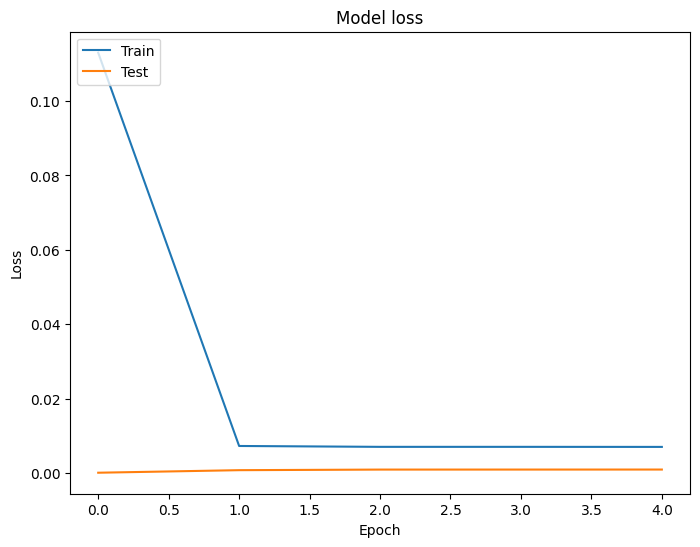

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Model 7
**Embedding -> LSTM -> Dense(activation:Softmax) -> Dense(Output(Sigmoid))**                         
**With this model, the effect of activation function is observed.**

In [ ]:
# Build Model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length =max_review_length))
model.add(LSTM(100))
model.add(Dense(64, kernel_initializer='uniform', activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train Model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=5)
result = model.evaluate(x_test, y_test, verbose=0)
# Results
print("Test Score:", result[0])
print("Test Accuracy:", result[1])
print("Accuracy: %.2f%%" % (result[1]*100))

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 470ms/step - accuracy: 0.5437 - loss: 0.6529 - val_accuracy: 1.0000 - val_loss: 0.5114
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 515ms/step - accuracy: 0.9992 - loss: 0.4948 - val_accuracy: 1.0000 - val_loss: 0.4458
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 472ms/step - accuracy: 0.9992 - loss: 0.4331 - val_accuracy: 1.0000 - val_loss: 0.3971
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 471ms/step - accuracy: 0.9992 - loss: 0.3874 - val_accuracy: 1.0000 - val_loss: 0.3579
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 519ms/step - accuracy: 0.9992 - loss: 0.3499 - val_accuracy: 1.0000 - val_loss: 0.3245
Test Score: 0.32454878091812134
Test Accuracy: 1.0
Accuracy: 100.00%


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


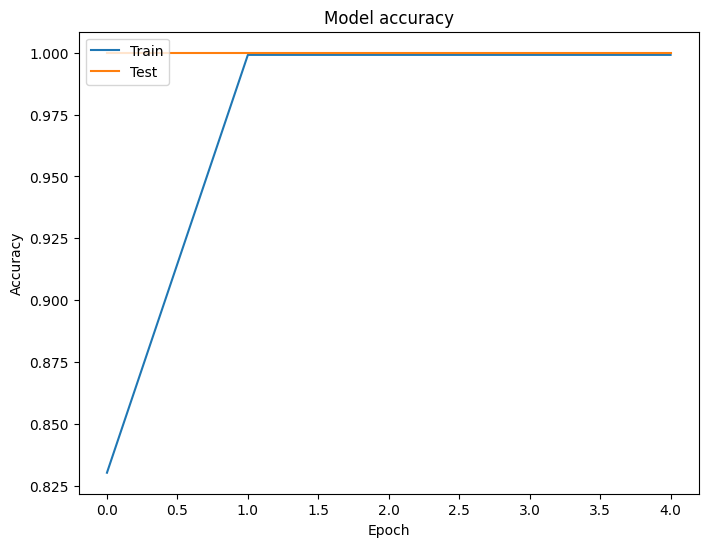

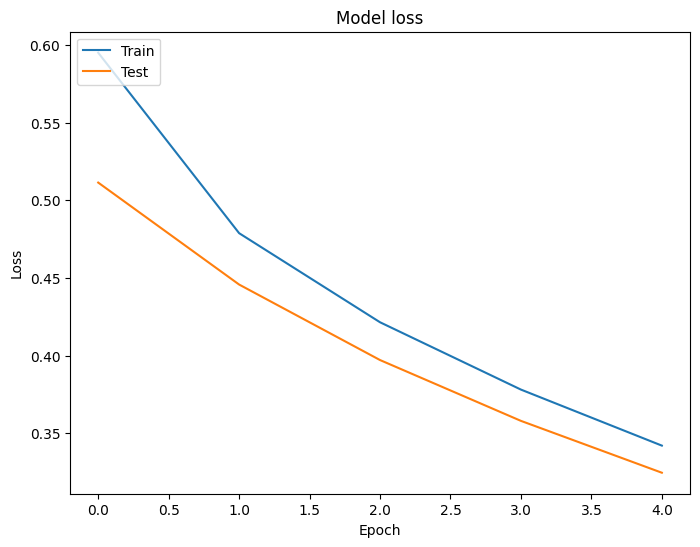

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion

Declaration

I, [Srushti Ghadge], confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link:
Signature: [Srushti Ghadge]